<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#검증-세트" data-toc-modified-id="검증-세트-1">검증 세트</a></span></li><li><span><a href="#모델-평가와-성능-향상" data-toc-modified-id="모델-평가와-성능-향상-2">모델 평가와 성능 향상</a></span><ul class="toc-item"><li><span><a href="#교차-검증(Cross-Validation)" data-toc-modified-id="교차-검증(Cross-Validation)-2.1">교차 검증(Cross Validation)</a></span></li><li><span><a href="#scikit-learn의-교차-검증" data-toc-modified-id="scikit-learn의-교차-검증-2.2">scikit-learn의 교차 검증</a></span></li><li><span><a href="#계층별(Stratified)-k-겹-교차-검증과-그외-전략들" data-toc-modified-id="계층별(Stratified)-k-겹-교차-검증과-그외-전략들-2.3">계층별(Stratified) k-겹 교차 검증과 그외 전략들</a></span></li><li><span><a href="#평가-지표-및-측정" data-toc-modified-id="평가-지표-및-측정-2.4">평가 지표 및 측정</a></span><ul class="toc-item"><li><span><a href="#최종-목표를-기억하라-:-학습되지-않은-새로운-데이터에서의-예측-성능을-높이는-것이-중요하다." data-toc-modified-id="최종-목표를-기억하라-:-학습되지-않은-새로운-데이터에서의-예측-성능을-높이는-것이-중요하다.-2.4.1">최종 목표를 기억하라 : 학습되지 않은 새로운 데이터에서의 예측 성능을 높이는 것이 중요하다.</a></span></li><li><span><a href="#이진-분류의-평가-지표" data-toc-modified-id="이진-분류의-평가-지표-2.4.2">이진 분류의 평가 지표</a></span><ul class="toc-item"><li><span><a href="#불균형-데이터셋" data-toc-modified-id="불균형-데이터셋-2.4.2.1">불균형 데이터셋</a></span></li><li><span><a href="#오차-행렬(Confusion-matrices)" data-toc-modified-id="오차-행렬(Confusion-matrices)-2.4.2.2">오차 행렬(Confusion matrices)</a></span></li></ul></li><li><span><a href="#다중-분류의-평가-지표" data-toc-modified-id="다중-분류의-평가-지표-2.4.3">다중 분류의 평가 지표</a></span></li></ul></li></ul></li></ul></div>

In [35]:
#!pip install watermark

In [36]:
#?watermark

In [37]:
%load_ext watermark
%watermark -v -p numpy,scipy,matplotlib
# ipython 버전(-v) and packages 버전(-p) 출력

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.6.8
IPython 7.15.0

numpy 1.18.5
scipy 1.4.1
matplotlib 3.2.2


In [38]:
# 패키지 import 및 환경설정 (numpy, pandas, matplotlib, mglearn 등)
from preamble import *

## 검증 세트

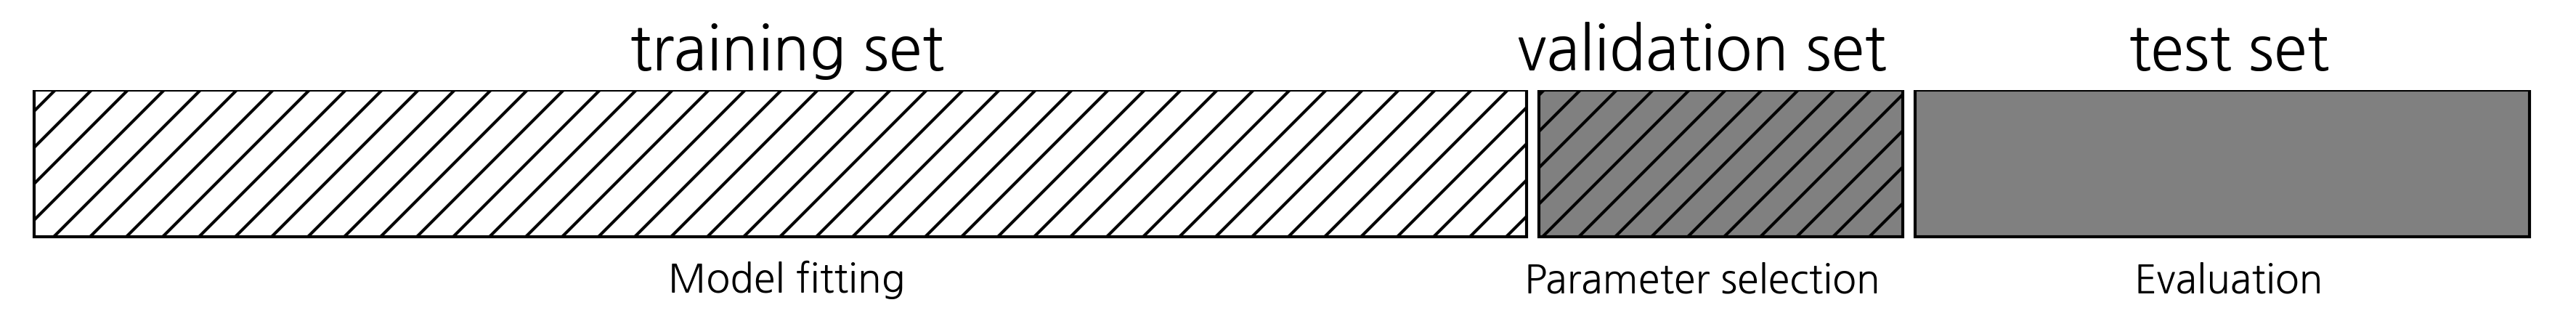

In [39]:
mglearn.plots.plot_threefold_split()

## 모델 평가와 성능 향상

In [40]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적인 데이터셋을 만듭니다
X, y = make_blobs(random_state=0)
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕니다
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 모델 객체를 만들고 훈련 세트로 학습시킵니다
logreg = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
# 모델을 테스트 세트로 평가합니다
print("테스트 세트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 세트 점수: 0.88


### 교차 검증(Cross Validation)

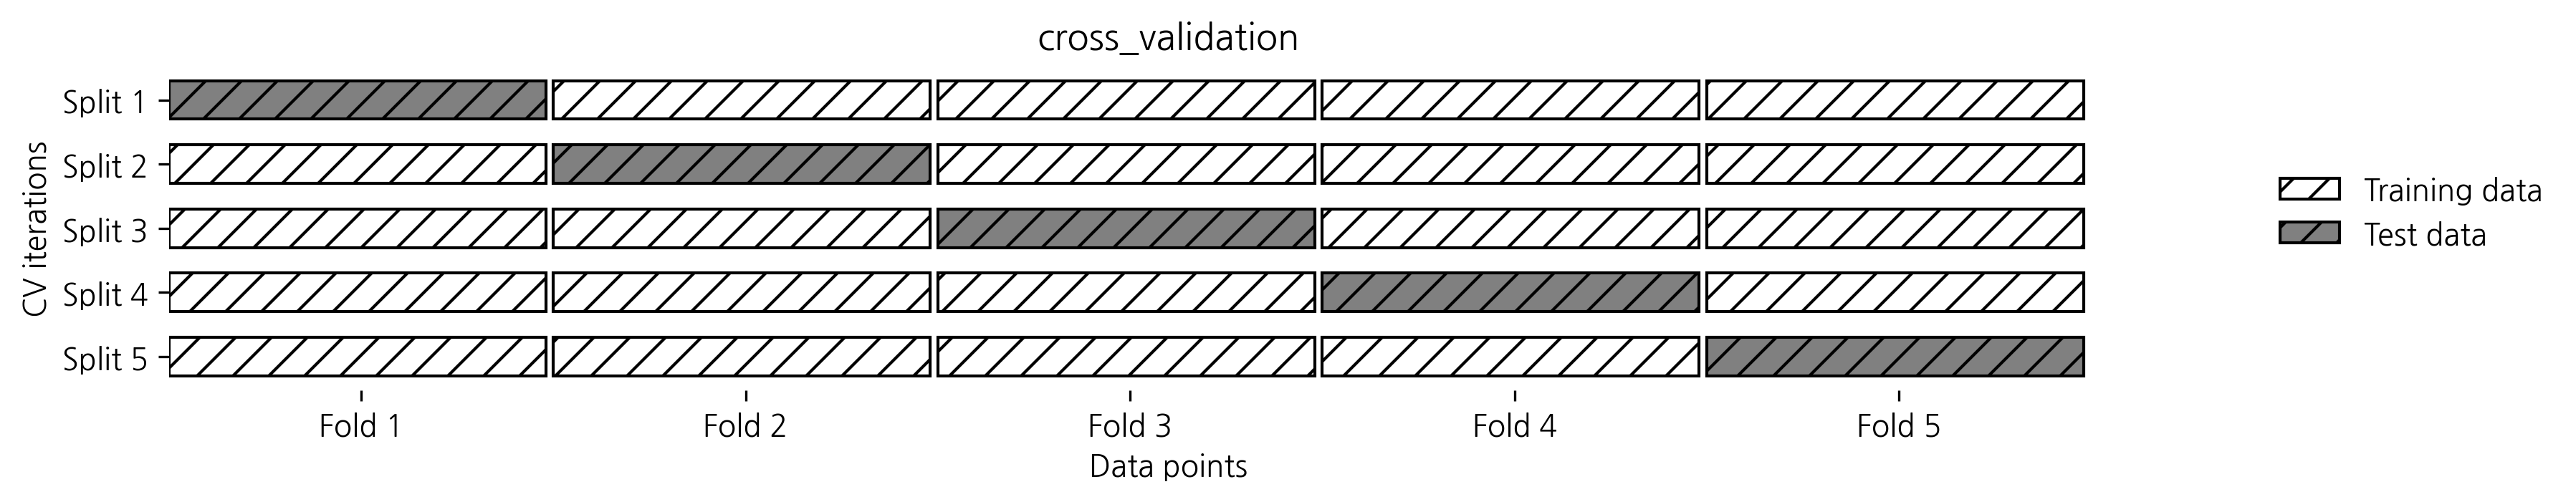

In [41]:
mglearn.plots.plot_cross_validation()

### scikit-learn의 교차 검증

사이킷런 0.22 버전에서 `cross_val_score` 함수의 `cv` 매개변수 기본값이 3에서 5로 바뀔 예정입니다. 0.20 버전에서 `cv` 매개변수를 지정하지 않는 경우 이에 관한 경고 메세지가 출력됩니다. 경고 메세지를 피하기 위해 `cv` 매개변수 값을 명시적으로 3으로 지정합니다.

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(solver='liblinear', multi_class='ovr')

scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [0.96 0.96 0.94]


In [43]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("교차 검증 점수: {}".format(scores))

교차 검증 점수: [1.    0.967 0.933 0.9   1.   ]


In [44]:
print("교차 검증 평균 점수: {:.2f}".format(scores.mean()))

교차 검증 평균 점수: 0.96


### 계층별(Stratified) k-겹 교차 검증과 그외 전략들

In [45]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris 레이블:\n{}".format(iris.target))

Iris 레이블:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


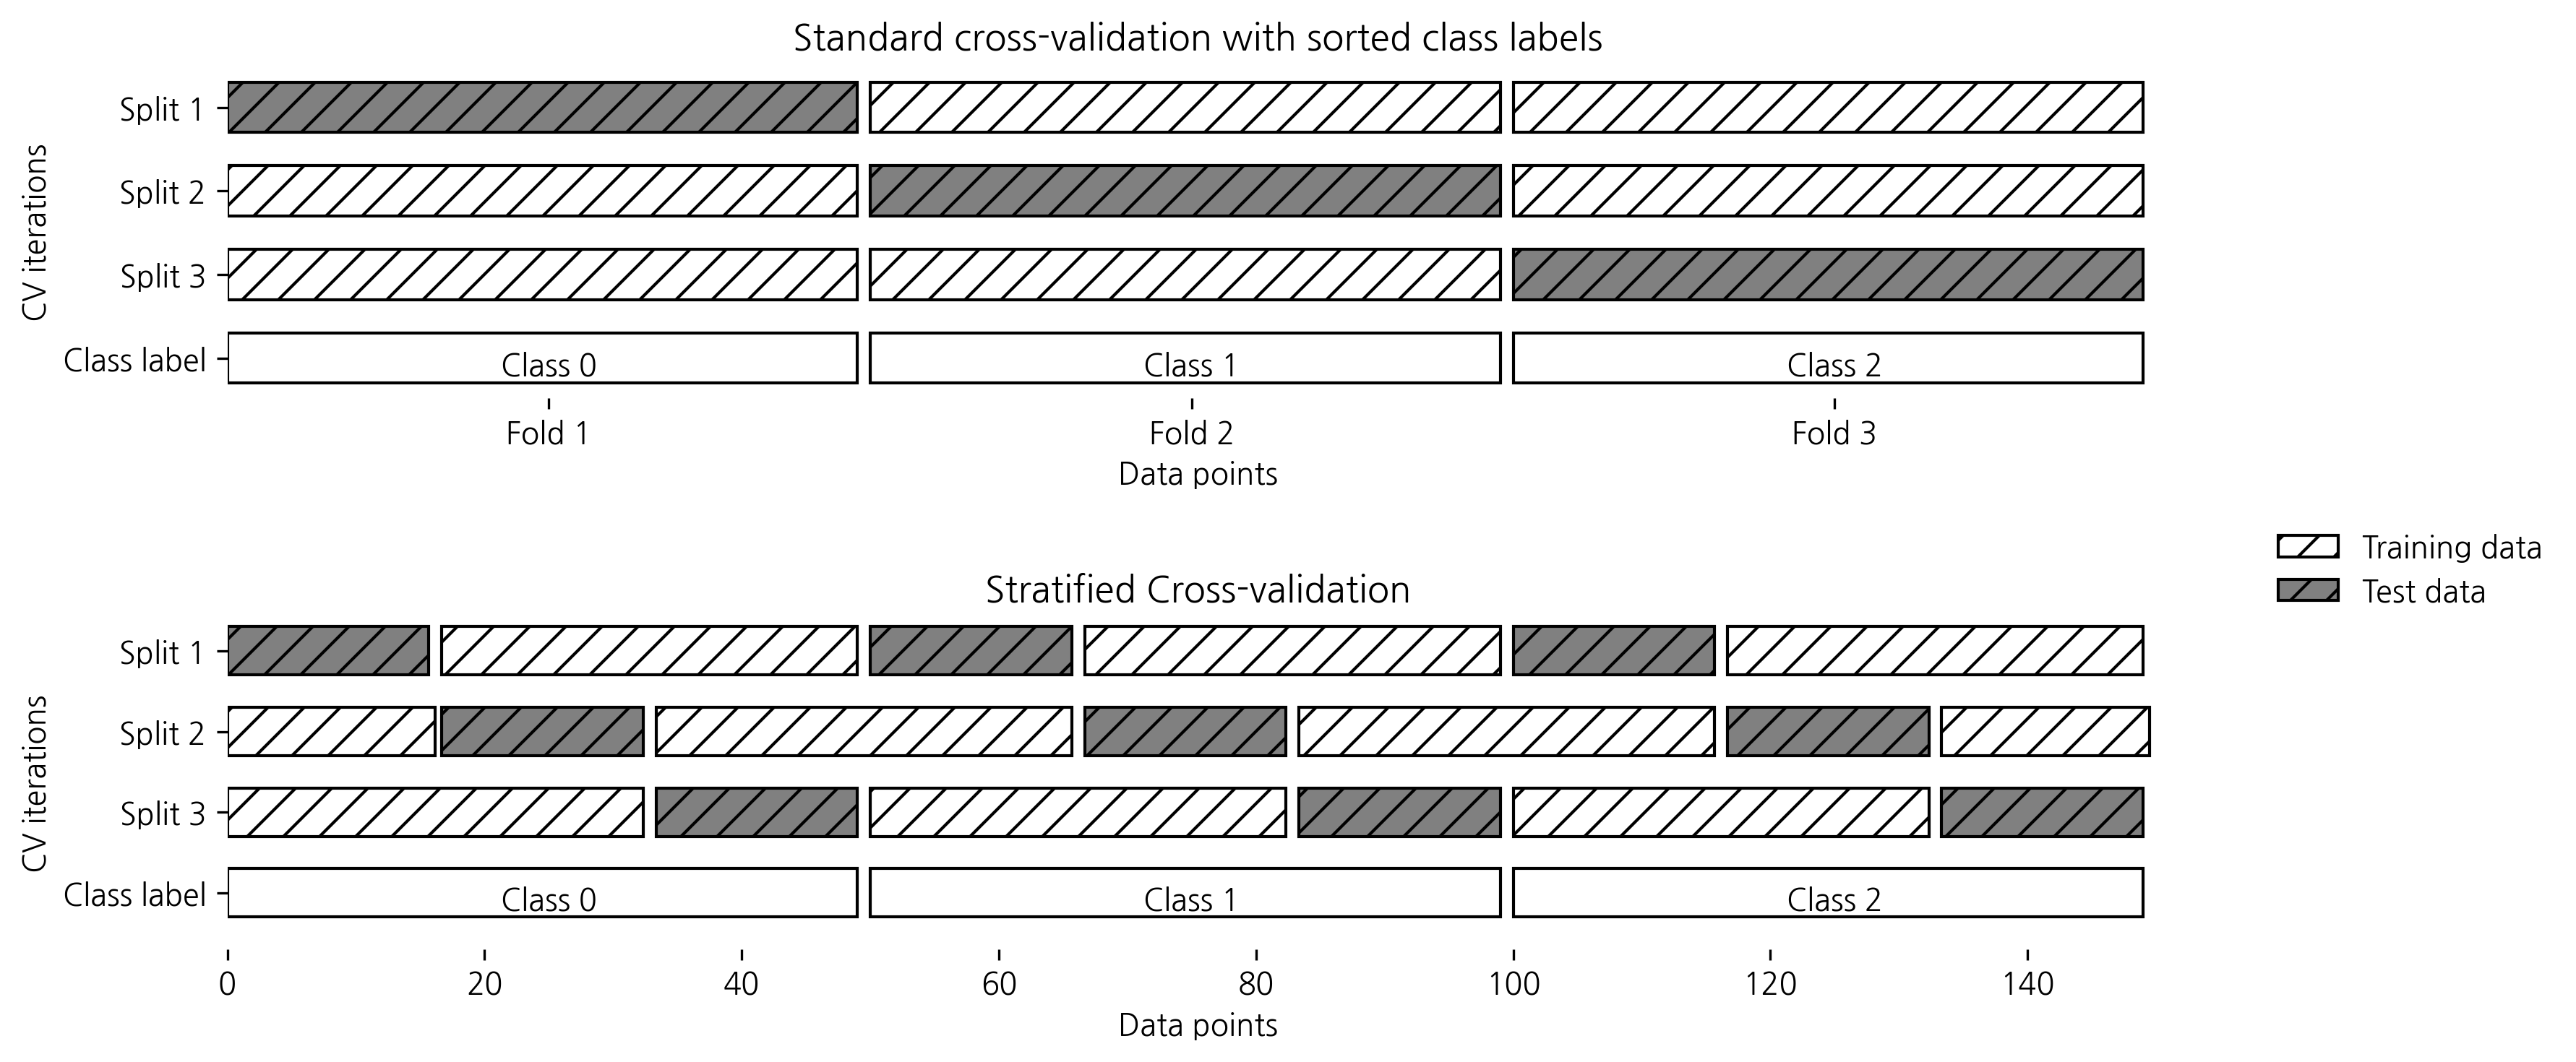

In [46]:
mglearn.plots.plot_stratified_cross_validation()

### 평가 지표 및 측정
#### 최종 목표를 기억하라 : 학습되지 않은 새로운 데이터에서의 예측 성능을 높이는 것이 중요하다.

#### 이진 분류의 평가 지표
##### 불균형 데이터셋

In [47]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [48]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("예측된 레이블의 고유값: {}".format(np.unique(pred_most_frequent)))
print("테스트 점수: {:.2f}".format(dummy_majority.score(X_test, y_test)))

예측된 레이블의 고유값: [False]
테스트 점수: 0.90


In [49]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("테스트 점수: {:.2f}".format(tree.score(X_test, y_test)))

테스트 점수: 0.92


In [50]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy 점수: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(solver='liblinear', C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg 점수: {:.2f}".format(logreg.score(X_test, y_test)))

dummy 점수: 0.83
logreg 점수: 0.98


/Users/alex/venvs/pinwheel/lib/python3.6/site-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


##### 오차 행렬(Confusion matrices)

In [51]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("오차 행렬:\n{}".format(confusion))

오차 행렬:
[[401   2]
 [  8  39]]


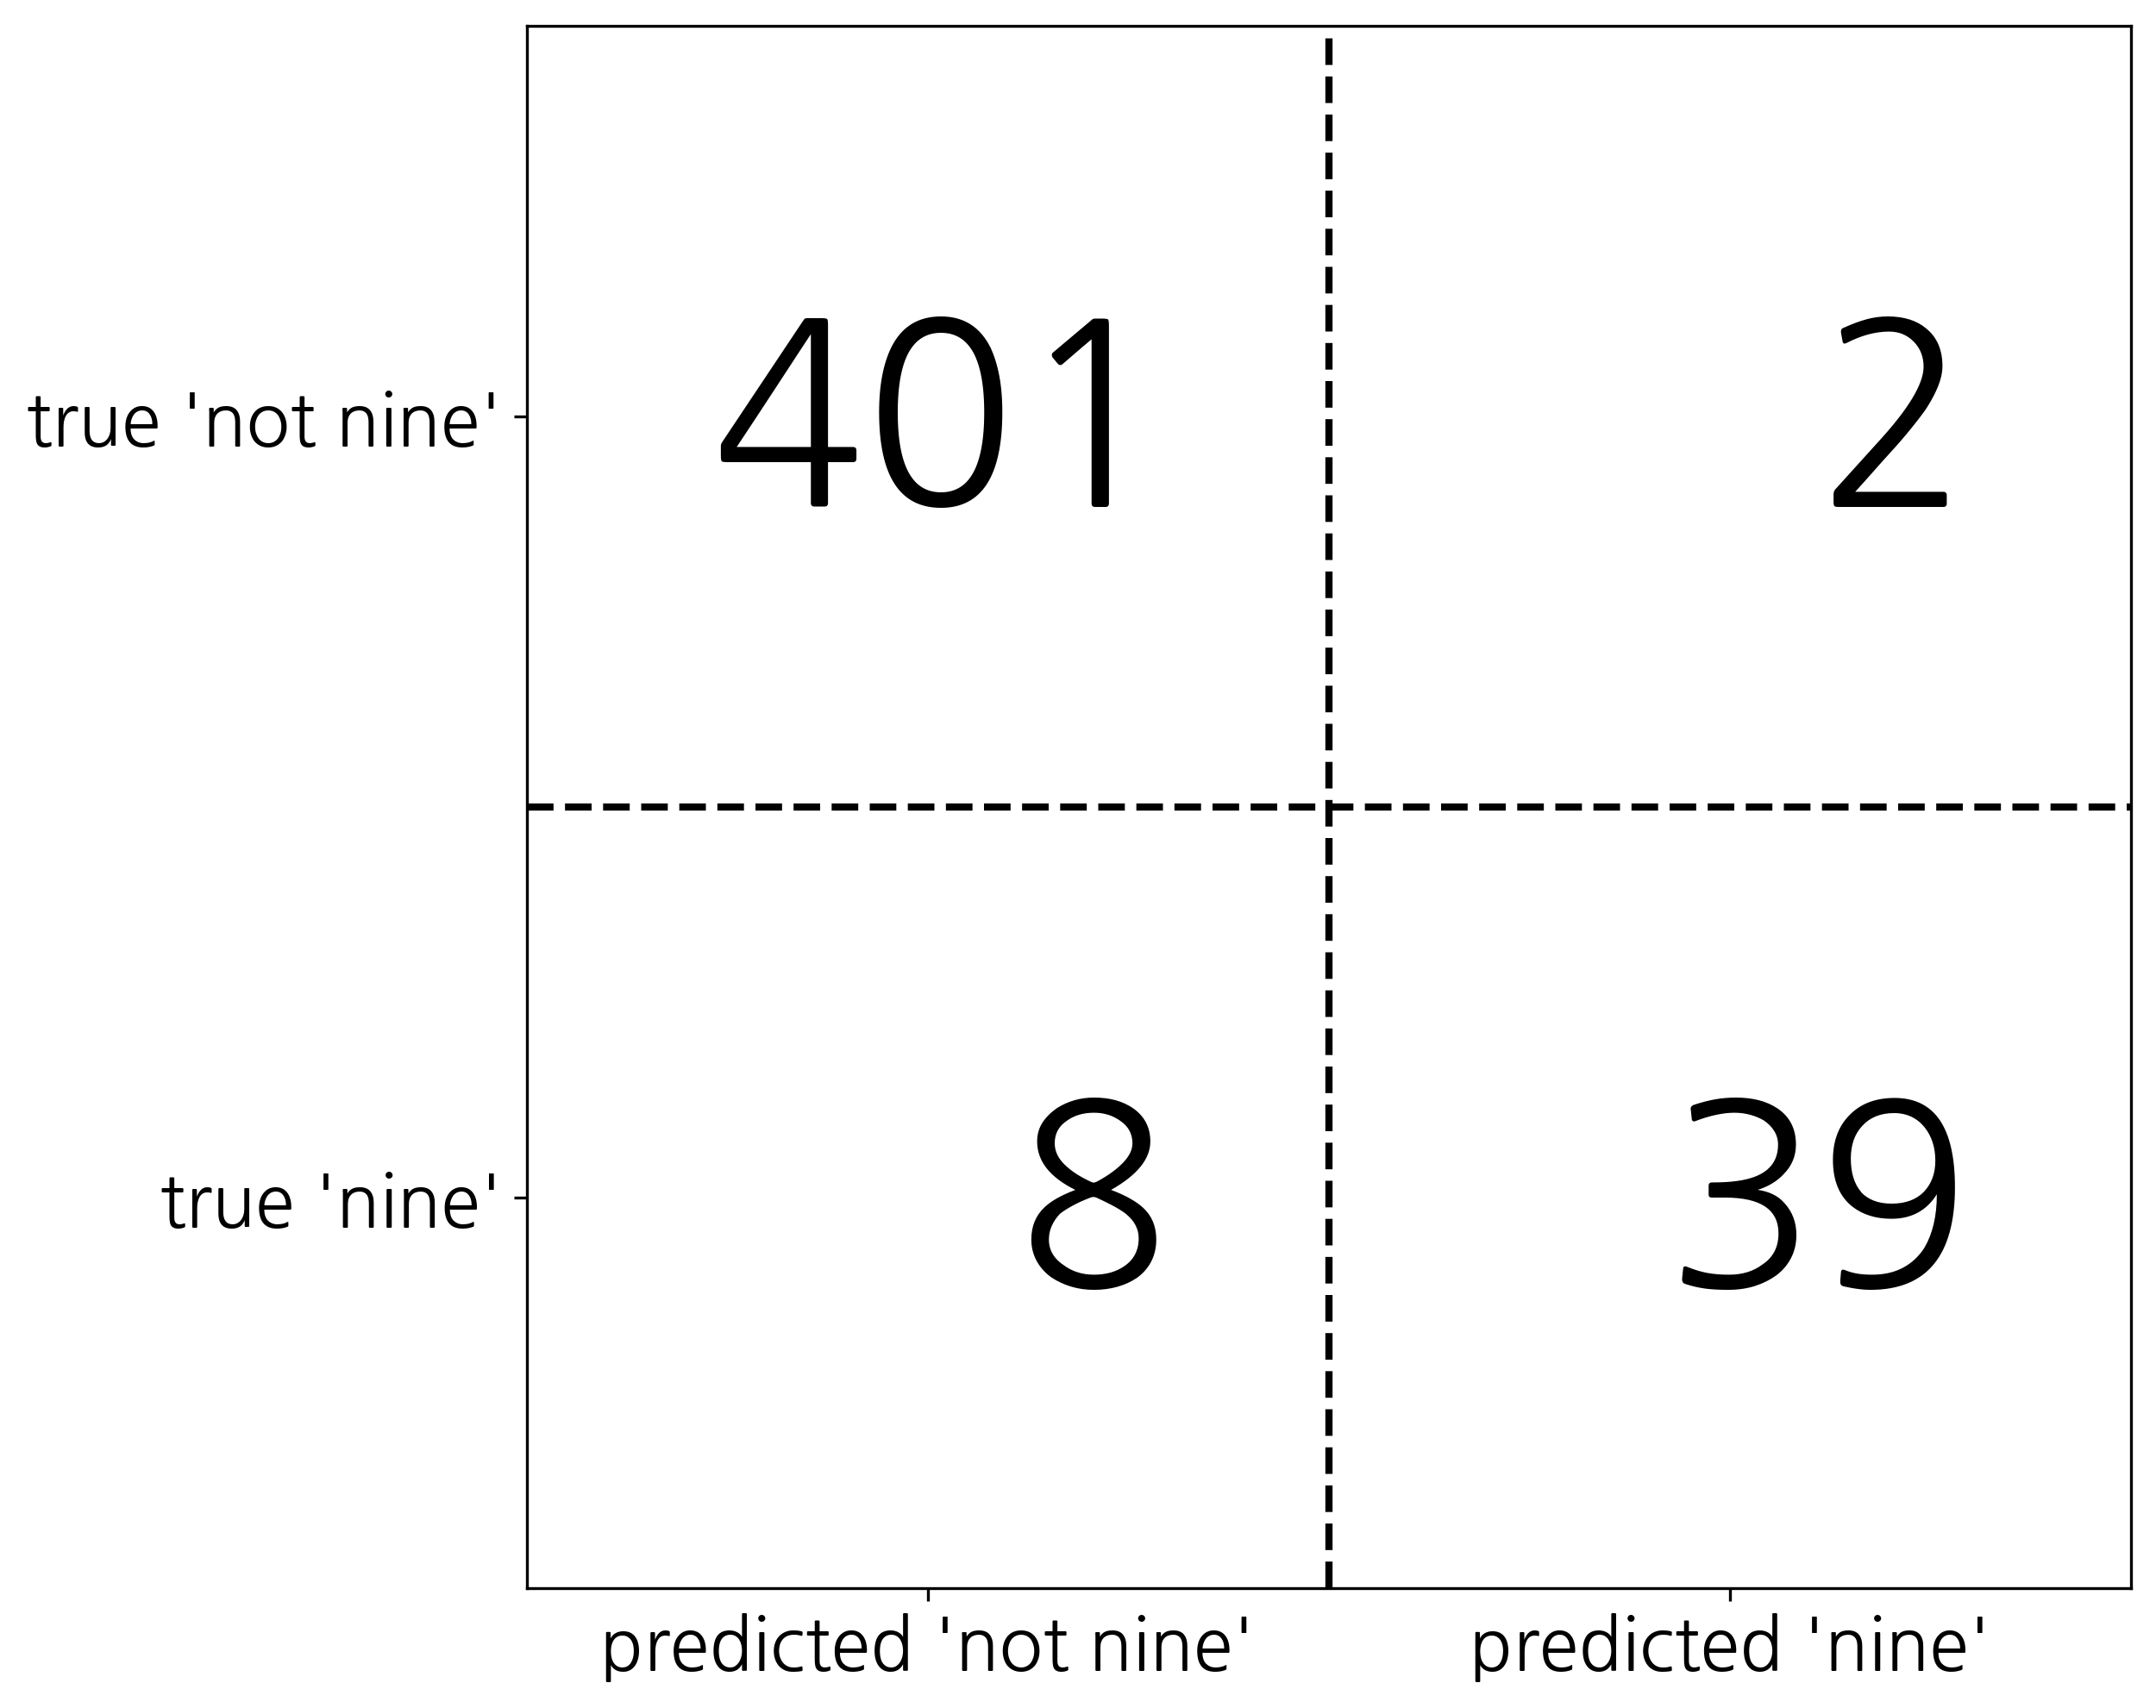

In [52]:
mglearn.plots.plot_confusion_matrix_illustration()

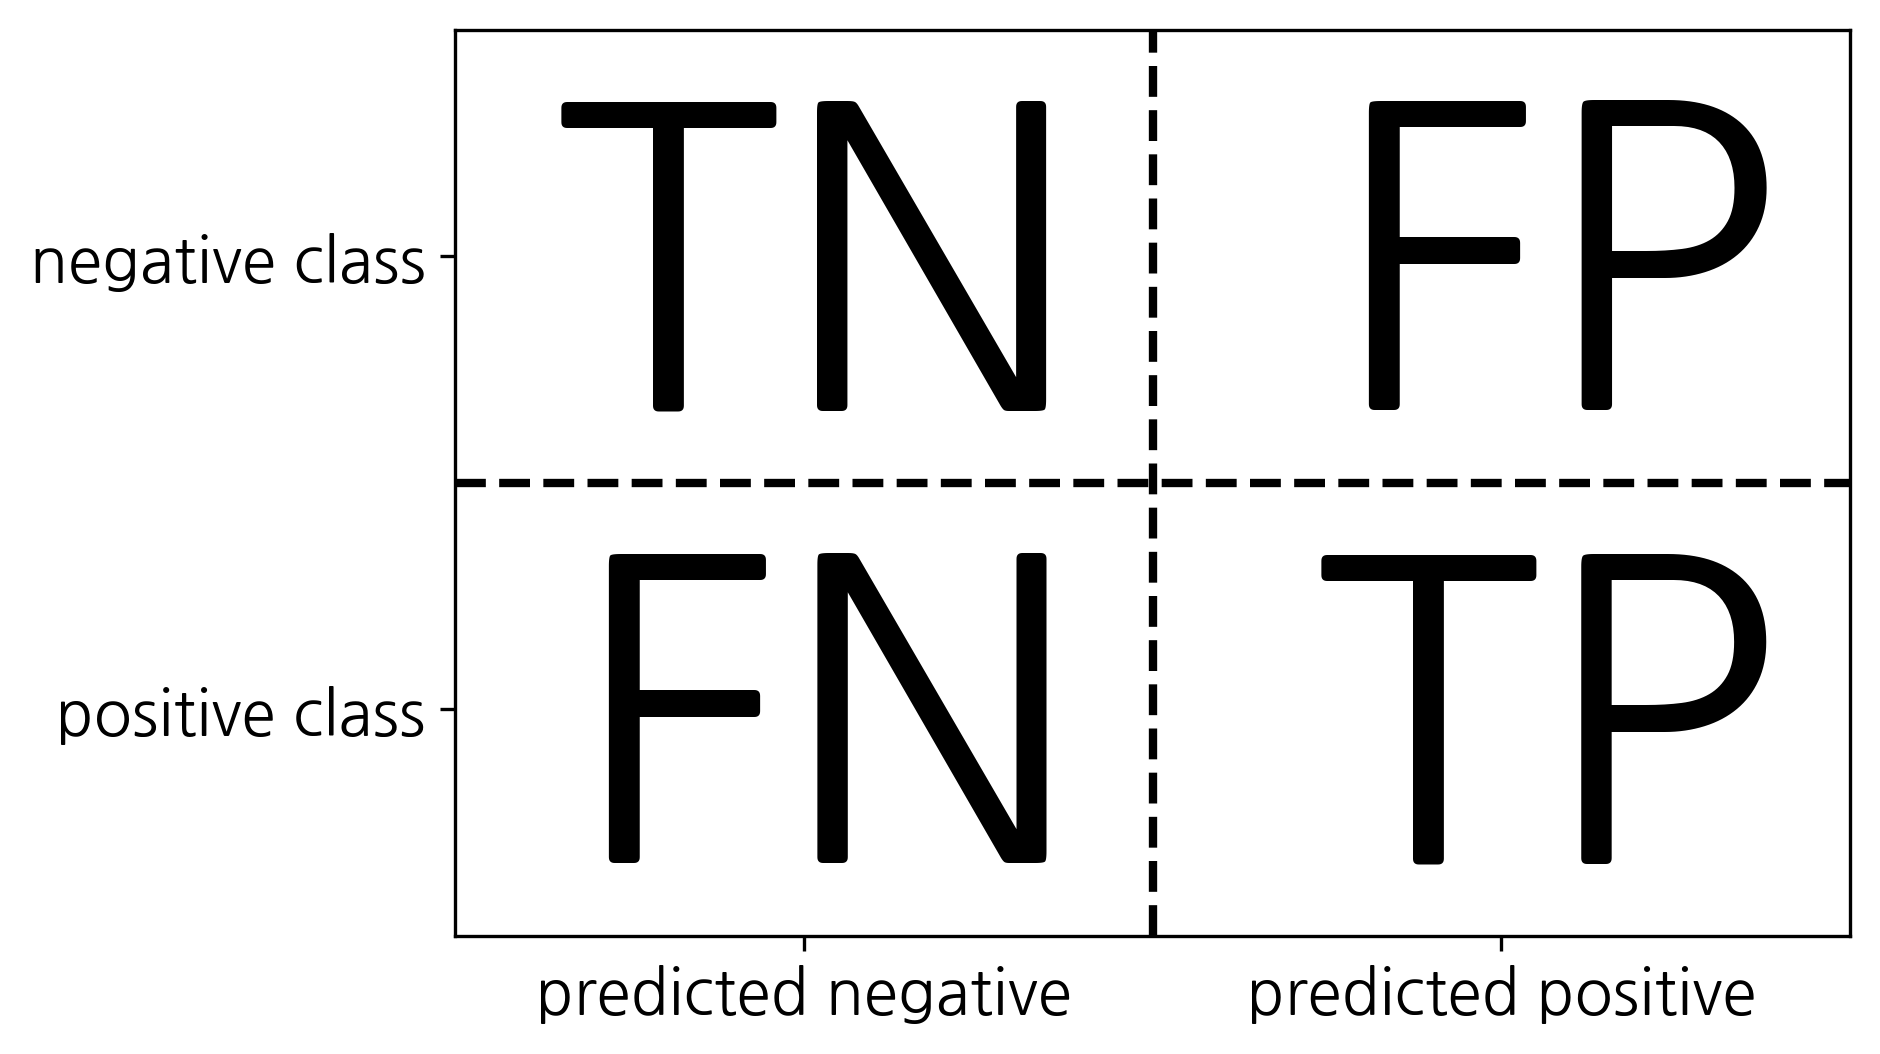

In [53]:
mglearn.plots.plot_binary_confusion_matrix()

In [54]:
print("빈도 기반 더미 모델:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\n무작위 더미 모델:")
print(confusion_matrix(y_test, pred_dummy))
print("\n결정 트리:")
print(confusion_matrix(y_test, pred_tree))
print("\n로지스틱 회귀")
print(confusion_matrix(y_test, pred_logreg))

빈도 기반 더미 모델:
[[403   0]
 [ 47   0]]

무작위 더미 모델:
[[353  50]
 [ 44   3]]

결정 트리:
[[390  13]
 [ 24  23]]

로지스틱 회귀
[[401   2]
 [  8  39]]


###### 정확도와의 관계
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

###### 정밀도, 재현율, f-점수
\begin{equation}
\text{정밀도} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

\begin{equation}
\text{재현율} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

\begin{equation}
\text{F} = 2 \cdot \frac{\text{정밀도} \cdot \text{재현율}}{\text{정밀도} + \text{재현율}}
\end{equation}

In [55]:
from sklearn.metrics import f1_score
print("빈도 기반 더미 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("무작위 더미 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("트리 모델의 f1 score: {:.2f}".format(f1_score(y_test, pred_tree)))
print("로지스틱 회귀 모델의 f1 score: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

빈도 기반 더미 모델의 f1 score: 0.00
무작위 더미 모델의 f1 score: 0.06
트리 모델의 f1 score: 0.55
로지스틱 회귀 모델의 f1 score: 0.89


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/Users/alex/venvs/pinwheel/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
print(classification_report(y_test, pred_dummy,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.89      0.88      0.88       403
           9       0.06      0.06      0.06        47

    accuracy                           0.79       450
   macro avg       0.47      0.47      0.47       450
weighted avg       0.80      0.79      0.80       450



In [58]:
print(classification_report(y_test, pred_logreg,
                            target_names=["9 아님", "9"]))

              precision    recall  f1-score   support

        9 아님       0.98      1.00      0.99       403
           9       0.95      0.83      0.89        47

    accuracy                           0.98       450
   macro avg       0.97      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



#### 다중 분류의 평가 지표

In [59]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
pred = lr.predict(X_test)
print("정확도: {:.3f}".format(accuracy_score(y_test, pred)))
print("오차 행렬:\n{}".format(confusion_matrix(y_test, pred)))

정확도: 0.953
오차 행렬:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


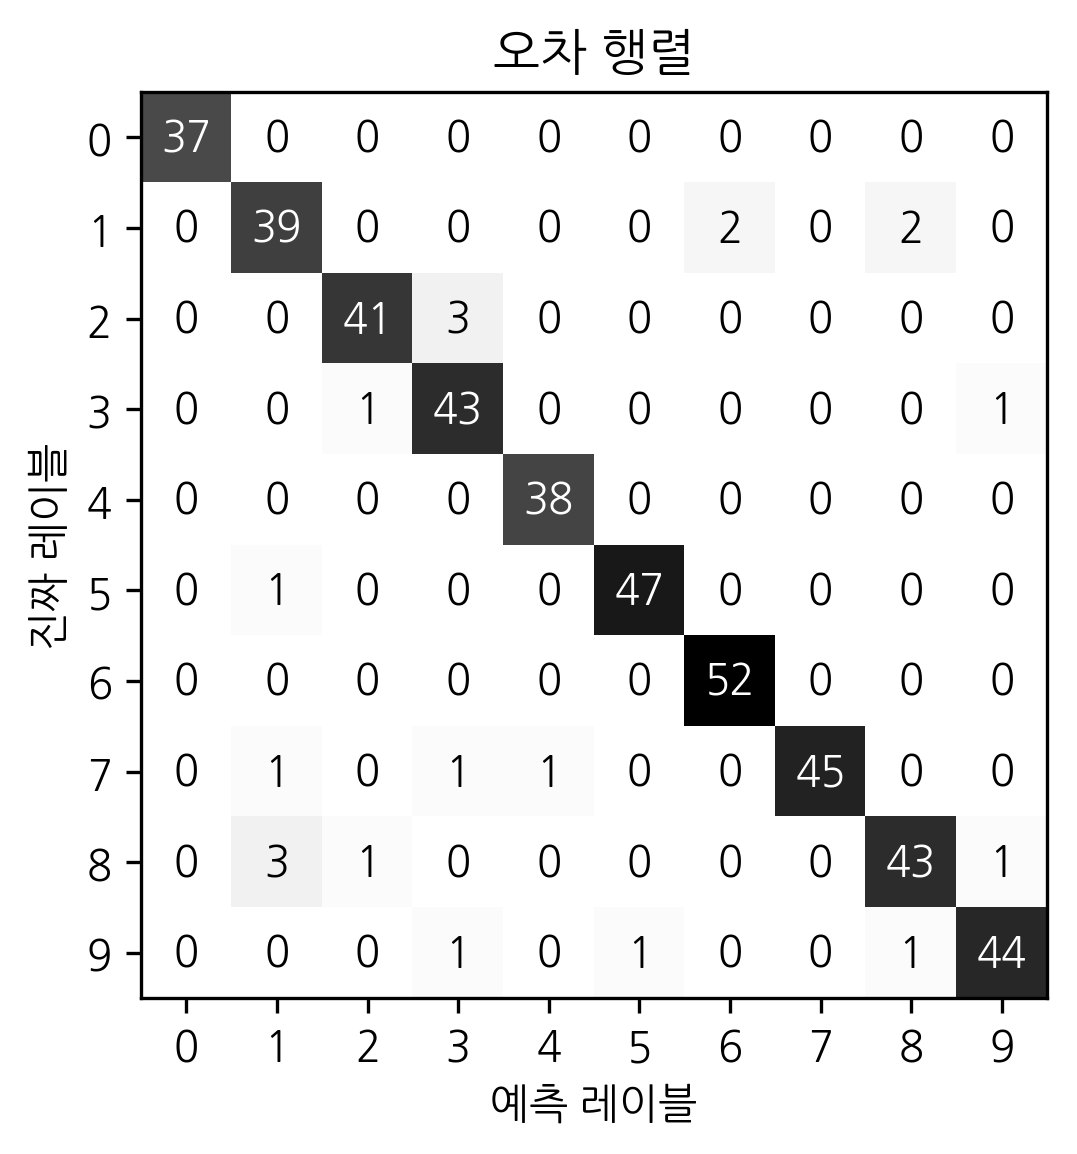

In [60]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")    
plt.title("오차 행렬")
plt.gca().invert_yaxis()

In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [62]:
print("micro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="micro")))
print("macro 평균 f1 점수: {:.3f}".format(f1_score(y_test, pred, average="macro")))

micro 평균 f1 점수: 0.953
macro 평균 f1 점수: 0.954
